<a href="https://colab.research.google.com/github/Don-Ho25/Colab_Git_Assignment2/blob/main/Lesson12/Assignment12_AI_NN_and_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 12

Dong

[link to Github](https://github.com/Don-Ho25/Colab_Git_Assignment2/blob/main/Lesson12/Assignment12_AI_NN_and_DeepLearning.ipynb)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models


The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images


In [ ]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


print("CIFAR-10 dataset loaded successfully!")
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

CIFAR-10 dataset loaded successfully!
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [ ]:
# Define the class names for CIFAR-10
#NB: The class names for the CIFAR-10 dataset is well know in the litterature and are are pre-defined and documented
#see link (https://www.cs.toronto.edu/~kriz/cifar.html)
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

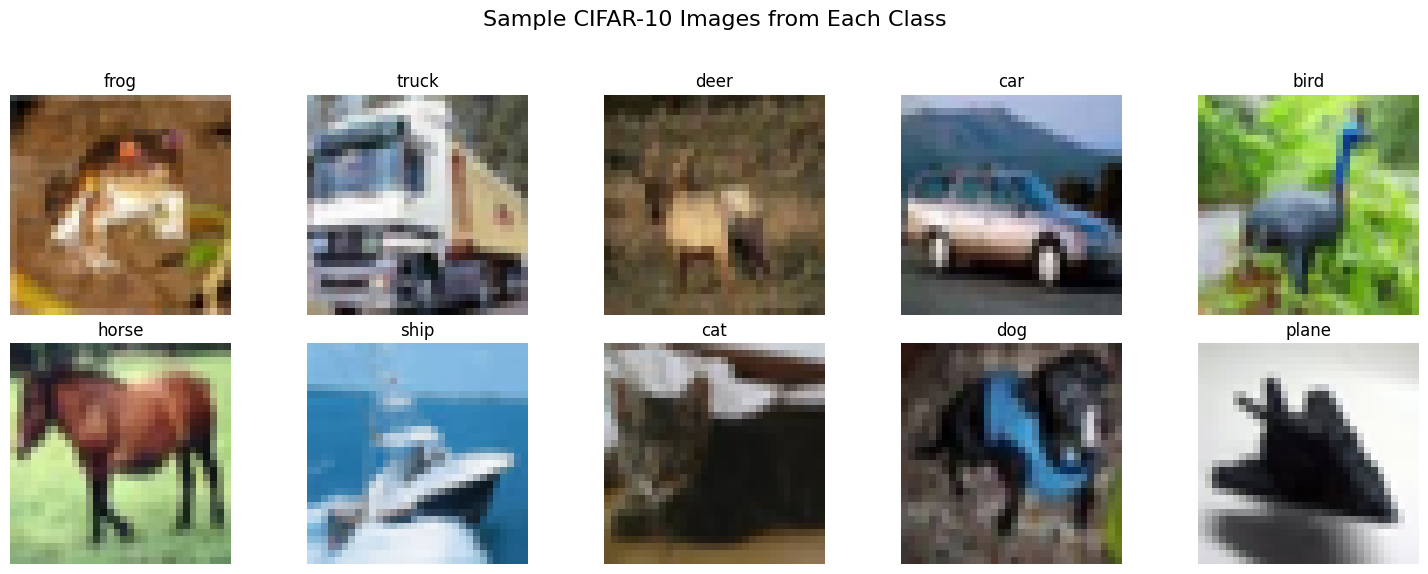

In [ ]:
# Create a dictionary to store one image per class
sample_images = {}

# Iterate through the training set to find one image for each class
# We'll stop once this list since it's larger
for i in range(len(x_train)):
    # Ensure y_train is handled correctly.
    # If y_train is (num_samples, 1) and contains integer labels:
    if y_train.ndim > 1:
        label_index = y_train[i][0]  # Access the first (and only) element of the label array
    else:
        label_index = y_train[i]

    # Convert label_index to an integer. This is the crucial fix.
    label_index_int = int(label_index)

    # Make sure 'classes' list is correctly defined with string names
    # e.g., classes = ['class0', 'class1', ..., 'class9']
    if label_index_int < len(classes):
        label_name = classes[label_index_int]

        if label_name not in sample_images:
            sample_images[label_name] = x_train[i]

        if len(sample_images) == len(classes):
            break  # Stop once we have one for each class

# Plot the sample images
num_classes = len(sample_images)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # Create a 2x5 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, class_name in enumerate(sample_images.keys()):
    if i >= len(axes):  # Safety check in case we have more classes than subplots
        break

    ax = axes[i]
    img = sample_images[class_name]

    # Ensure image data is in the correct format and range for imshow
    # If x_train was normalized to [0, 1] earlier (e.g., x_train / 255.0), it's fine.
    # If x_train is still 0-255 integer, imshow usually handles it.
    # For grayscale images, you might need cmap='gray' for imshow.
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis('off')  # Hide axes ticks and labels

# Hide any unused subplots
for i in range(len(sample_images), len(axes)):
    axes[i].axis('off')

plt.suptitle('Sample CIFAR-10 Images from Each Class', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
plt.show()

#### Normalization:   
Scale the image pixel values to a range of 0 to 1 to facilitate neural network training.  Dividing by the maximum possible pixel value (255) scales all pixel values down to the range of [0.0, 1.0].


In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0



# Convert labels to one-hot encoding (required for categorical_crossentropy)
# CIFAR-10 has 10 classes
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Reshape y_train and y_test to remove the extra dimension
y_train = y_train.reshape(-1, num_classes)
y_test = y_test.reshape(-1, num_classes)


#### Neural Network Implementation (build the NN usinf tensorflow)


In [ ]:
"""
- define the model architecture
- define the input layer with the shape
- define the hidden layers
- define the output layer
"""

# i. model architecture
neural_net = tf.keras.models.Sequential() # every node is connected to every node in the next layer and previous layer

# ii. input layer
# Correct the input shape to include the color channel
neural_net.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))

# iii. hidden layers
neural_net.add(tf.keras.layers.Dense(256, activation='relu'))
neural_net.add(tf.keras.layers.Dense(256, activation='relu'))#can change the activation function
# adds two "Dense" (fully connected) layers to the neural_net

# iv. output layer
neural_net.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

print("summary of the model\n")
neural_net.summary()

summary of the model



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       786,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855,050 (3.26 MB)

 Trainable params: 855,050 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

#### Traning the model after getting the architecture


In [ ]:
# Compilation:  Compile the model with the Adam optimizer, categorical crossentropy as the loss function, and accuracy as the metric.
neural_net.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_history = neural_net.fit(x_train, y_train, validation_split= 0.2, batch_size= 64, epochs=15)


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.2710 - loss: 2.0214 - val_accuracy: 0.3663 - val_loss: 1.7519
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.3822 - loss: 1.7189 - val_accuracy: 0.3871 - val_loss: 1.6903
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4176 - loss: 1.6234 - val_accuracy: 0.4172 - val_loss: 1.6326
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4420 - loss: 1.5660 - val_accuracy: 0.4210 - val_loss: 1.6267
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4531 - loss: 1.5290 - val_accuracy: 0.4361 - val_loss: 1.5667
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.4665 - loss: 1.4872 - val_accuracy: 0.4493 - val_loss: 1.5551
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4772 - loss: 1.4542 - val_accuracy: 0.4701 - val_loss: 1.5069
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.4899 - loss: 1.4191 - 

In [ ]:

#  Evaluate the model on the test set
print("\nEvaluating the model on the test set:")
# test_loss, test_acc = model.evaluate(test_images_flat, test_labels, verbose=2)
test_loss, test_acc = neural_net.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


Evaluating the model on the test set:
313/313 - 1s - 4ms/step - accuracy: 0.4909 - loss: 1.4609
Test accuracy: 0.4909
Test loss: 1.4609


The accuracy of the model  on the traning set is about 54.6% while that of the test set is 49.75%.

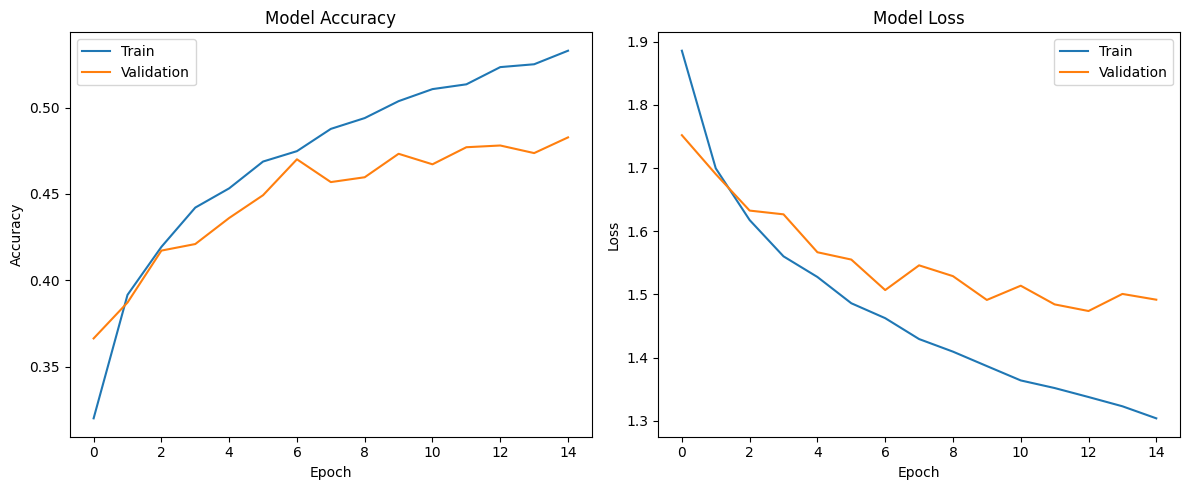

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()


Evaluating model on the test set...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


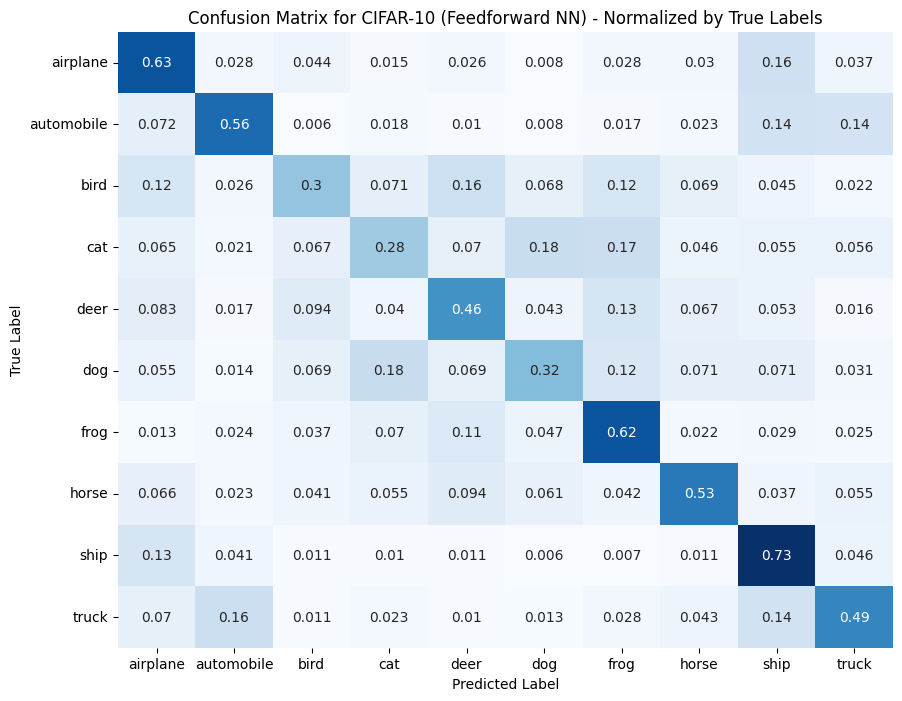

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Evaluate the model on the test set
print("\nEvaluating model on the test set...")
# loss, accuracy = neural_net.evaluate(x_test, y_test, verbose=0)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")

# Get predictions for the test set
y_pred = neural_net.predict(x_test)
y_pred = np.argmax(y_pred, axis=1) # Convert probabilities to class labels

# Get true labels (flattened from one-hot if necessary for sklearn functions)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred,normalize='true')
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.2', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for CIFAR-10 (Feedforward NN) - Normalized by True Labels')
plt.show()

In [ ]:
#  Classification Report
print("\nClassification Report:\n")
report = classification_report(y_true, y_pred, target_names=class_names, digits=3)
print(report)



Classification Report:

              precision    recall  f1-score   support

    airplane      0.482     0.628     0.545      1000
  automobile      0.611     0.562     0.585      1000
        bird      0.438     0.296     0.353      1000
         cat      0.363     0.276     0.314      1000
        deer      0.449     0.456     0.453      1000
         dog      0.428     0.322     0.368      1000
        frog      0.486     0.623     0.546      1000
       horse      0.579     0.526     0.551      1000
        ship      0.497     0.727     0.590      1000
       truck      0.536     0.493     0.514      1000

    accuracy                          0.491     10000
   macro avg      0.487     0.491     0.482     10000
weighted avg      0.487     0.491     0.482     10000



The Neural Network achieved an overall accuracy of 49.75% on the CIFAR-10 dataset, which slitgthly low and hence  indicates substantial room for improvement in model performance. The model struggles most with classifying 'cat'  and bird (lowest precision and f1-score), while exhibiting a peculiar performance for 'frog' with high recall but low precision, suggesting it frequently misidentifies other objects as frogs.

 Overall, the results point to a need for significant model enhancements. Convolutional Neural Networks  better suited for image recognition could be the way forward.